In [52]:
library(readr)
analysis.anova <- read.csv("C:/Users/radhapavan/Desktop/Alex/anova.csv", sep=",", header = TRUE)


In [53]:
str(analysis.anova)

'data.frame':	1048575 obs. of  3 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ parent_category_name: Factor w/ 9 levels "Animals","Consumer electronics",..: 6 4 2 6 9 6 4 6 6 6 ...
 $ deal_probability    : num  0.128 0 0.432 0.803 0.208 ...


In [54]:
is.factor(analysis.anova$parent_category_name)

[1] TRUE

In [55]:
levels(analysis.anova$parent_category_name)

[1] "Animals"                "Consumer electronics"   "For business"          
[4] "For home and cottages"  "Hobbies and Recreation" "Personal things"       
[7] "The property"           "The services"           "Transport"

In [57]:
library(dplyr)

<h1> First Basic data summary </h1>


In [58]:
group_by(analysis.anova, parent_category_name) %>%
  summarise(
    count = n(),
    mean = mean(deal_probability, na.rm = TRUE),
    sd = sd(deal_probability, na.rm = TRUE)
  )

parent_category_name,count,mean,sd
Animals,36597,0.23661539,0.2869582
Consumer electronics,120880,0.17496128,0.2787824
For business,12629,0.11146424,0.2178563
For home and cottages,124477,0.17958620,0.3065312
Hobbies and Recreation,60152,0.12320775,0.2594957
Personal things,486510,0.07596101,0.2092683
The property,106565,0.14201891,0.1916491
The services,44885,0.40239752,0.3461604
Transport,55880,0.26201842,0.2920424


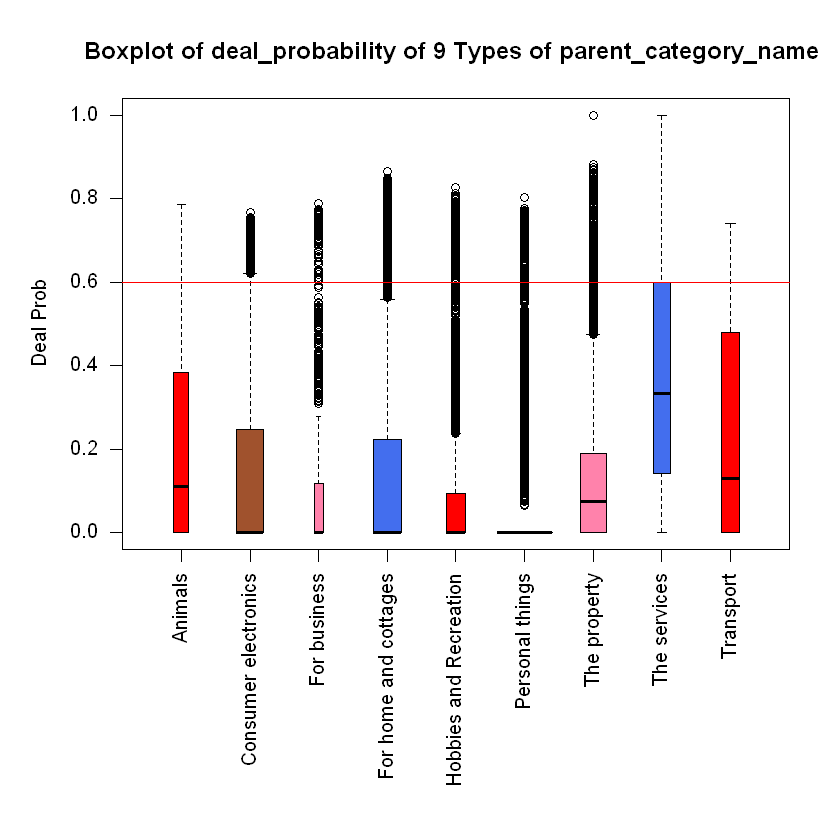

In [59]:
boxplot(analysis.anova$deal_probability~analysis.anova$parent_category_name, main="Boxplot of deal_probability of 9 Types of parent_category_name ", las=2,
col = c("red","sienna","palevioletred1","royalblue2","red","sienna","palevioletred1", "royalblue2","red","sienna","palevioletred1","royalblue2"), , par(mar = c(12, 5, 4, 2) + 0.1), ylab ="Deal Prob",  notch = FALSE,    varwidth = TRUE)

abline(h=0.6,col="red") # for line above

<h1> With GGPLOT </h1>

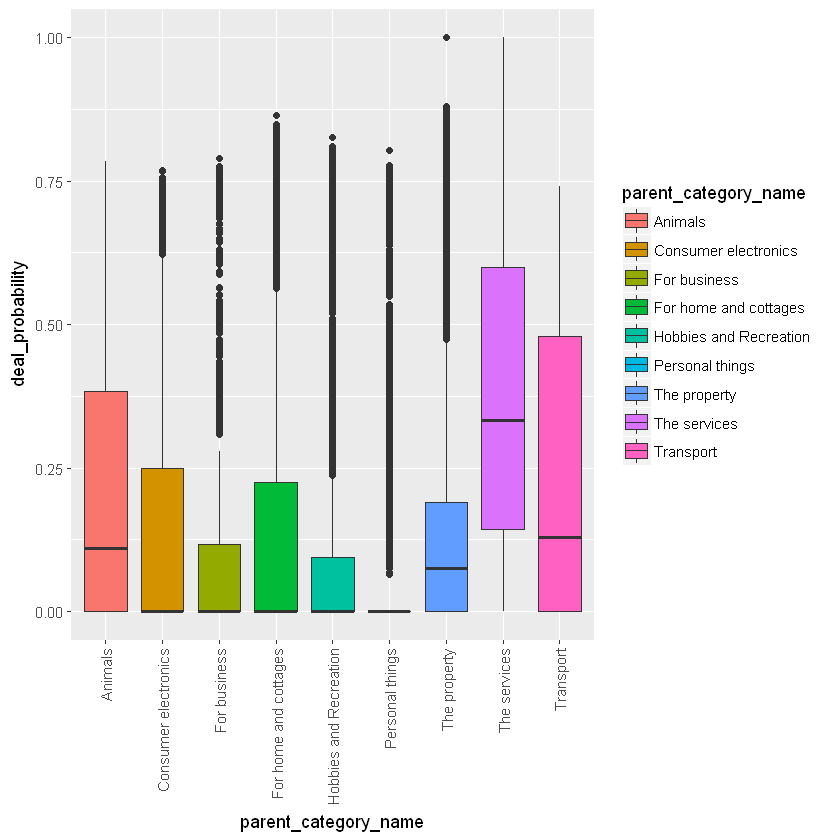

In [60]:
## issue with this
library(ggplot2)
ggplot(analysis.anova, aes(x=parent_category_name, y=deal_probability,  fill=parent_category_name)) + 
     geom_boxplot() + 
     theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1))

<h1> ANOVA - Oneway Models </h1> <h3> Parent Category Name is the Levels / Factors/categories. Finding this data against Deal_probability is will give is this significant.

In [61]:
model1<- aov(analysis.anova$deal_probability~analysis.anova$parent_category_name)
print(model1)

Call:
   aov(formula = analysis.anova$deal_probability ~ analysis.anova$parent_category_name)

Terms:
                analysis.anova$parent_category_name Residuals
Sum of Squares                              6628.69  64117.90
Deg. of Freedom                                   8   1048566

Residual standard error: 0.2472816
Estimated effects may be unbalanced


In [62]:
summary(model1)

                                         Df Sum Sq Mean Sq F value Pr(>F)    
analysis.anova$parent_category_name       8   6629   828.6   13550 <2e-16 ***
Residuals                           1048566  64118     0.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [63]:
model2 <-  oneway.test(analysis.anova$deal_probability~analysis.anova$parent_category_name)
print(model2)


	One-way analysis of means (not assuming equal variances)

data:  analysis.anova$deal_probability and analysis.anova$parent_category_name
F = 10188, num df = 8, denom df = 150150, p-value < 2.2e-16



In [64]:
# Chisquare
model3 <- kruskal.test(analysis.anova$deal_probability~analysis.anova$parent_category_name)
print(model3)


	Kruskal-Wallis rank sum test

data:  analysis.anova$deal_probability by analysis.anova$parent_category_name
Kruskal-Wallis chi-squared = 163440, df = 8, p-value < 2.2e-16



<h3> Pairwise T-test </h3>

In [65]:
pairwise.t.test(analysis.anova$deal_probability, analysis.anova$parent_category_name,
                 p.adjust.method = "BH", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  analysis.anova$deal_probability and analysis.anova$parent_category_name 

                       Animals Consumer electronics For business
Consumer electronics   < 2e-16 -                    -           
For business           < 2e-16 < 2e-16              -           
For home and cottages  < 2e-16 9.2e-05              < 2e-16     
Hobbies and Recreation < 2e-16 < 2e-16              1.1e-07     
Personal things        < 2e-16 < 2e-16              < 2e-16     
The property           < 2e-16 < 2e-16              < 2e-16     
The services           < 2e-16 < 2e-16              < 2e-16     
Transport              < 2e-16 < 2e-16              < 2e-16     
                       For home and cottages Hobbies and Recreation
Consumer electronics   -                     -                     
For business           -                     -                     
For home and cottages  -                     -                     
Hobb

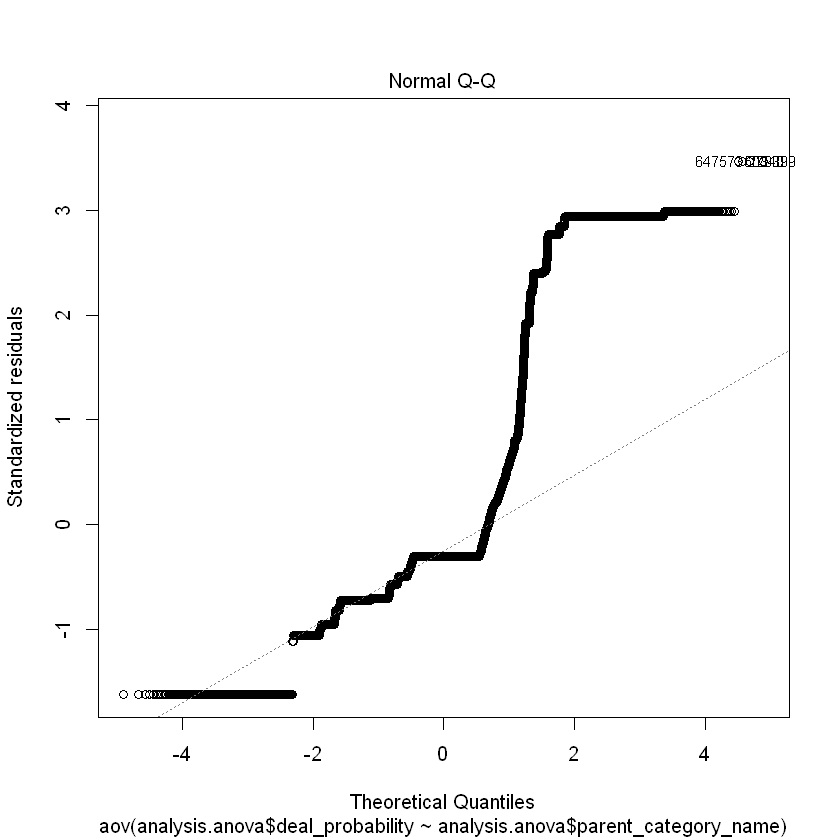

In [66]:
#normality plot			 
plot(model1, 2)		
# You can add 1,3,4, replacing 2, to see other plots

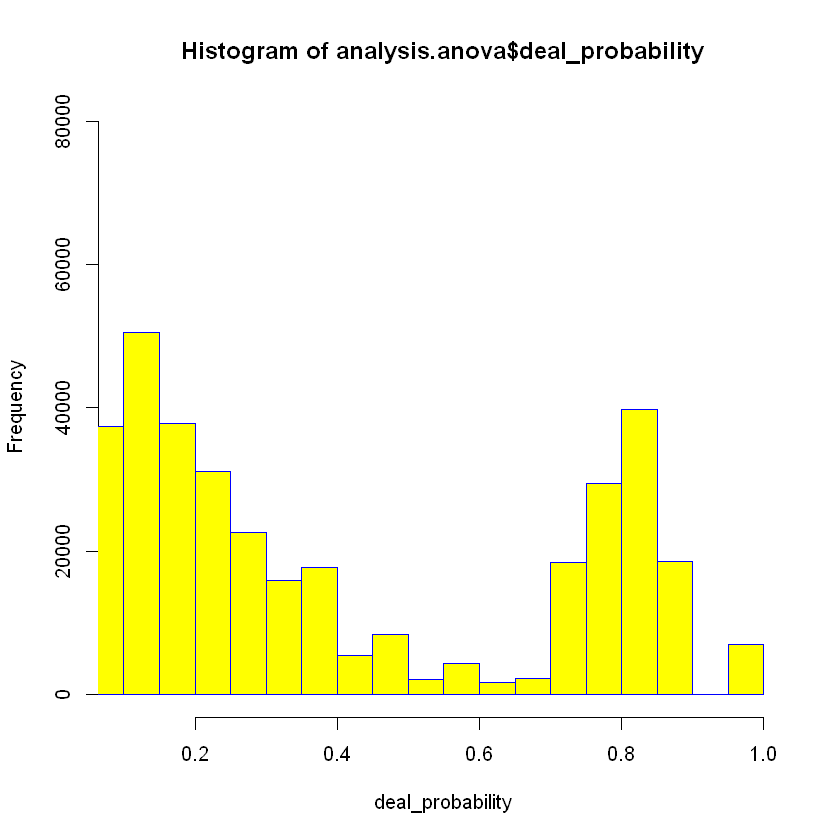

In [26]:
# Excluded Deal _probality = 0 , zero values are excluded. If you want add in Xlim=c(0.0,1.0)
hist(analysis.anova$deal_probability,xlab = "deal_probability",col = "yellow",border = "blue",xlim=c(0.1,1.0), ylim=c(0,80000), breaks=18)


Warning message:
"Removed 817853 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

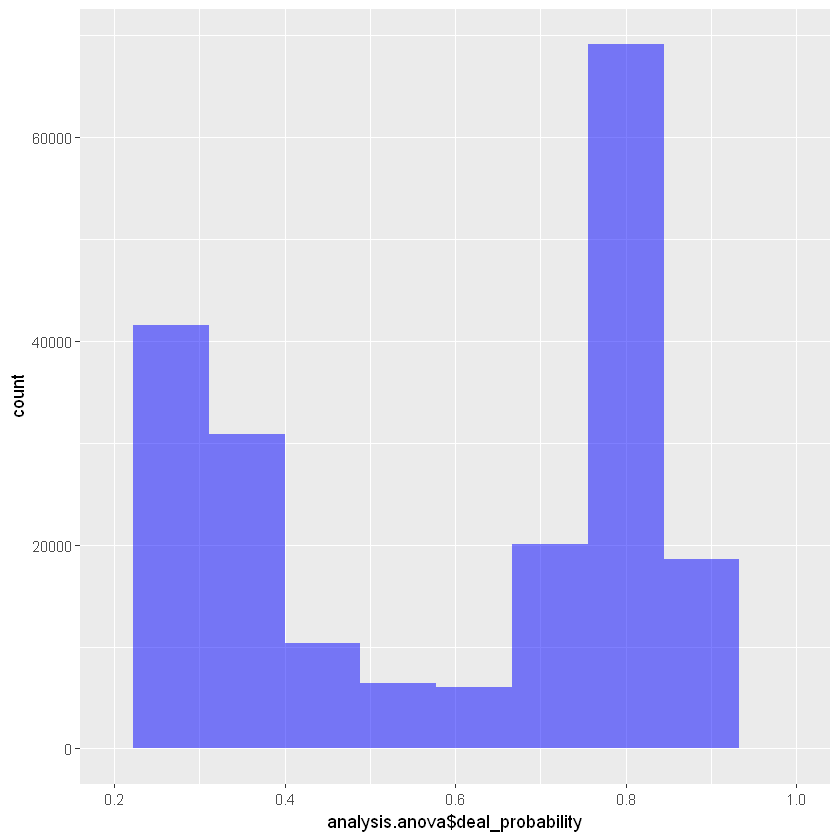

In [67]:
# Same histogram in Ggplot/qplot. Better Histogram from this !!
qplot(analysis.anova$deal_probability, geom="histogram",bins=10, xlim=c(0.2,1.0), fill=I("blue"), alpha=I(.5)) 

<h2> ANOVA Model furthe Analysis </h2>

In [68]:
TukeyHSD(model1, conf.level = 0.99)


  Tukey multiple comparisons of means
    99% family-wise confidence level

Fit: aov(formula = analysis.anova$deal_probability ~ analysis.anova$parent_category_name)

$`analysis.anova$parent_category_name`
                                                     diff          lwr
Consumer electronics-Animals                 -0.061654111 -0.066951182
For business-Animals                         -0.125151152 -0.134313720
For home and cottages-Animals                -0.057029190 -0.062308444
Hobbies and Recreation-Animals               -0.113407637 -0.119293398
Personal things-Animals                      -0.160654379 -0.165466692
The property-Animals                         -0.094596476 -0.099975594
The services-Animals                          0.165782127  0.159529182
Transport-Animals                             0.025403034  0.019432776
For business-Consumer electronics            -0.063497041 -0.071799768
For home and cottages-Consumer electronics    0.004624921  0.001039794
Hobbies and R

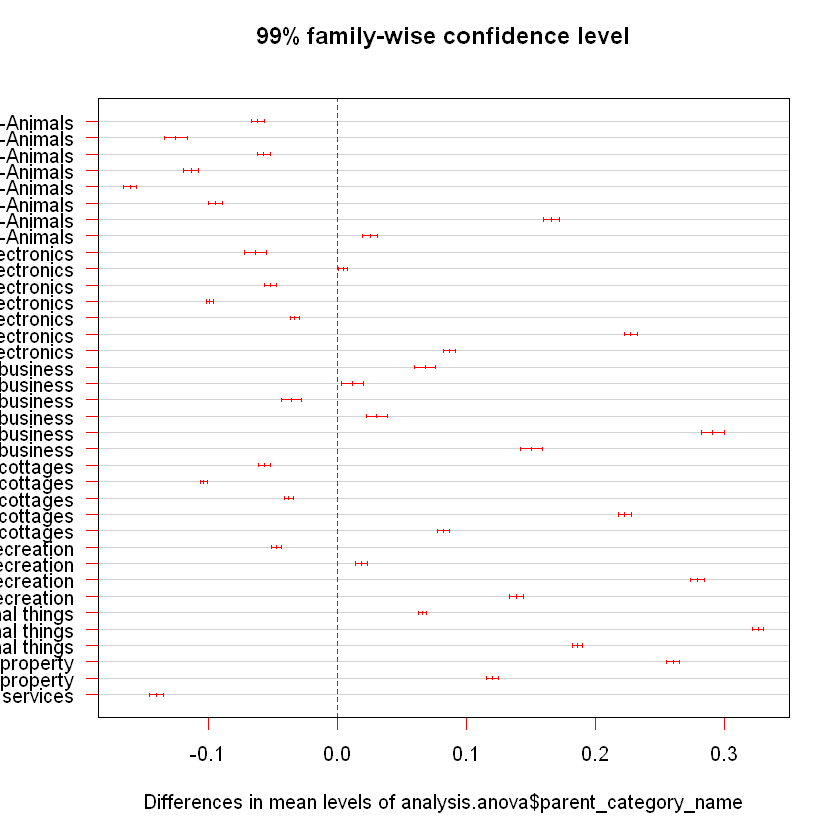

In [41]:
plot(TukeyHSD(model1, conf.level = 0.99),las=1, col = "red")

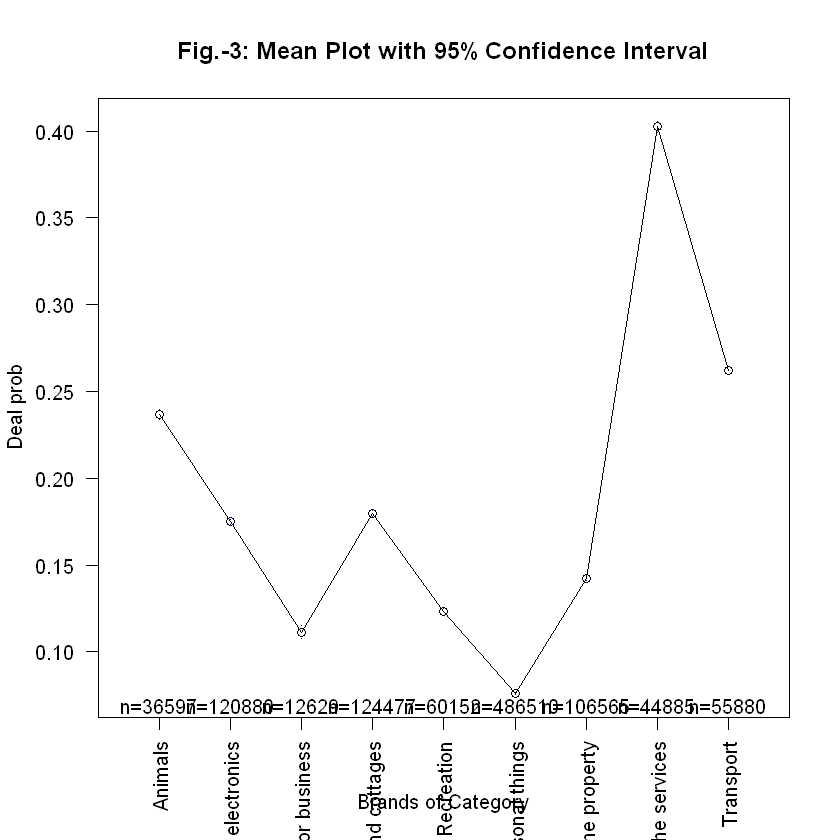

In [72]:
# MEAN Plots

library(gplots)
suppressWarnings(plotmeans(analysis.anova$deal_probability ~ analysis.anova$parent_category_name, main="Fig.-3: Mean Plot with 95% Confidence Interval", ylab = "Deal prob", xlab = "Brands of Category", las=2))

In [73]:
# Residuals
uhat<-resid(model1)
print(uhat)

            1             2             3             4             5 
 5.192899e-02 -1.795862e-01  2.568087e-01  7.272690e-01 -5.404842e-02 
            6             7             8             9            10 
 7.272690e-01 -1.795862e-01  7.272690e-01 -7.596101e-02 -7.596101e-02 
           11            12            13            14            15 
 4.465111e-01 -7.596101e-02  6.261899e-02 -1.749613e-01 -2.366154e-01 
           16            17            18            19            20 
-7.596101e-02  5.898158e-02 -7.596101e-02 -7.596101e-02 -3.859891e-02 
           21            22            23            24            25 
-1.420189e-01 -7.596101e-02 -1.586784e-01 -7.596101e-02 -2.366154e-01 
           26            27            28            29            30 
 3.199899e-02 -1.795862e-01 -7.596101e-02 -7.596101e-02 -7.596101e-02 
           31            32            33            34            35 
-1.795862e-01  5.483946e-01 -1.749613e-01 -1.256689e-01  4.134616e-01 
      

In [74]:
#Now you may apply the Shapiro-Wilk test for normality with the following hypotheses set-up:

shapiro.test(uhat)  # our sample size is big, so this is NO use

ERROR: Error in shapiro.test(uhat): sample size must be between 3 and 5000


In [75]:
# BARLETT test
bartlett.test(analysis.anova$deal_probability~analysis.anova$parent_category_name)


	Bartlett test of homogeneity of variances

data:  analysis.anova$deal_probability by analysis.anova$parent_category_name
Bartlett's K-squared = 71983, df = 8, p-value < 2.2e-16


In [76]:
# levene test
library(car)
leveneTest(analysis.anova$deal_probability~analysis.anova$parent_category_name)

,Df,F value,Pr(>F)
group,8,9778.707,0
,1048566,NA,NA


In [51]:
## chisq
chisq.test(analysis.anova$parent_category_name, analysis.anova$deal_probability)

Warning message in chisq.test(analysis.anova$parent_category_name, analysis.anova$deal_probability):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  analysis.anova$parent_category_name and analysis.anova$deal_probability
X-squared = 4174200, df = 129410, p-value < 2.2e-16


<h3> Conclusion : Data is significantly different ( primary category Name) on Deal Probability. so it have significant effect on Deal Probability. Overall distributed Normal distribution  and Lot of zero( 0 ) deal in the data. Some times, we need to exclude that data for further analysis. </h3> We may need to check with stats expert for his further opinion !!
